<a href="https://colab.research.google.com/github/DewashishCodes/Hands-on-ML-algorithms/blob/main/LogisticRegres.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [3]:
iris=datasets.load_iris()
X=iris.data[:,:2]
y=(iris.target !=0)*1

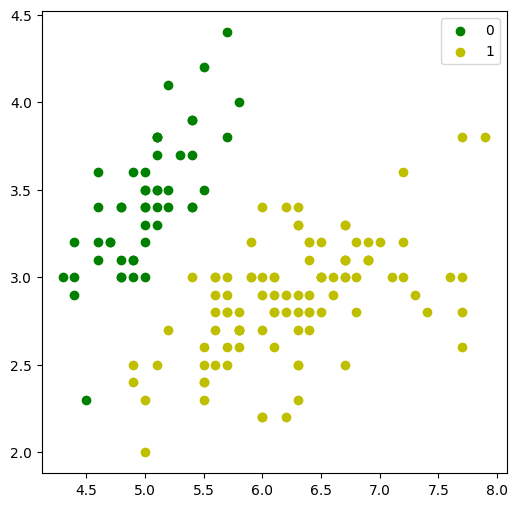

In [5]:
plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend();

In [12]:
class LogisticRegression:
  def __init__(self,lr=0.01,num_iter=100000,fit_intercept=True,verbose=False):
    self.lr=lr
    self.num_iter=num_iter
    self.fit_intercept=fit_intercept
    self.verbose=verbose

  def __add_intercept(self,X):
    intercept=np.ones((X.shape[0],1))
    return np.concatenate((intercept,X),axis=1)

  def __sigmoid(self,z):
    return 1/(1+np.exp(-z))

  def __loss(self,h,y):
    return (-y*np.log(h)-(1-y)*np.log(1-h)).mean()

  def fit(self,X,y):
    if self.fit_intercept:
      X=self.__add_intercept(X)

    self.theta=np.zeros(X.shape[1])

    for i in range(self.num_iter):
      z=np.dot(X,self.theta)
      h=self.__sigmoid(z)
      gradient=np.dot(X.T,(h-y))
      self.theta -= self.lr*gradient

      if self.verbose and i % 10000 == 0:
                loss = self.__loss(h, y)
                print(f'loss: {loss:.4f}')

  def predict_prob(self, X):
   if self.fit_intercept:
      X = self.__add_intercept(X)
   return self.__sigmoid(np.dot(X, self.theta))

  def predict(self, X):
   return self.predict_prob(X).round()



In [14]:

model = LogisticRegression(lr=0.1, num_iter=300000)
model.fit(X, y)


preds = model.predict(X)
print("Accuracy:", (preds == y).mean())

Accuracy: 1.0


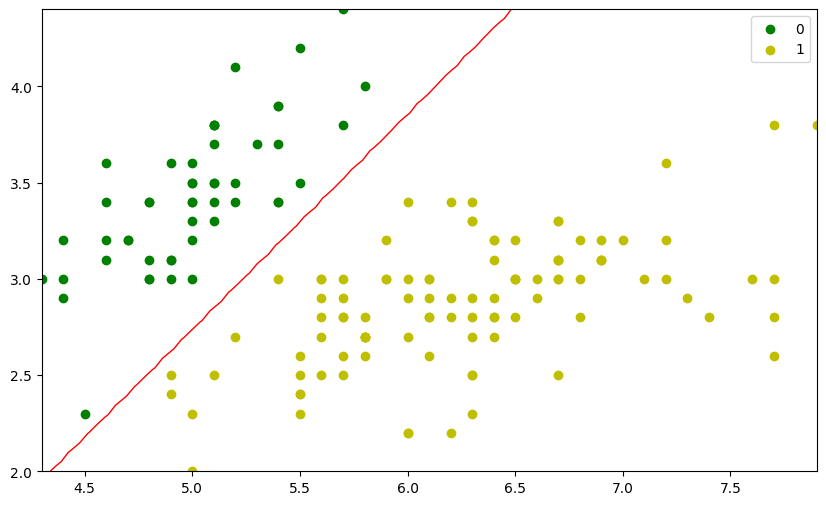

In [15]:


plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='g', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='y', label='1')
plt.legend()
x1_min, x1_max = X[:,0].min(), X[:,0].max(),
x2_min, x2_max = X[:,1].min(), X[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='red');


In [17]:
import sklearn
from sklearn import datasets
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [18]:
digits = datasets.load_digits()

In [19]:
X = digits.data
y = digits.target

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

In [21]:
digreg = linear_model.LogisticRegression()

In [22]:
digreg.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred = digreg.predict(X_test)

In [24]:
print("Accuracy of Logistic Regression model is:",
metrics.accuracy_score(y_test, y_pred)*100)

Accuracy of Logistic Regression model is: 96.52294853963839
